In [5]:
import sys
sys.path.append("..")
from flame_analysis_model import *
import pandas as pd
import torch

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)
if device.type == "cuda":
    print("GPU:", torch.cuda.get_device_name(0))

Using device: cuda
GPU: NVIDIA GeForce RTX 3050 4GB Laptop GPU


In [7]:
## Read data
time_step = 212
phi = 0.40
lat_size = 100

df = pd.read_csv(f"../isocontours/phi{phi:.2f}/h400x{lat_size}_ref/extracted_flame_front_{time_step}.csv")

In [8]:
features = ['u', 'v', 'H2',
       'O2', 'H2O', 'H', 'O', 'OH', 'HO2', 'H2O2', 'N2', 'heat_release',
       'curvature', 'stretch_rate',
       'abs_flame_prop_vel_normal', 'flow_velocity_normal',
       'flow_velocity_tangential', 'tangential_strain_rate',
       'normal_strain_rate', 'total_strain_rate', 'density_ratio_sigma',
       'vorticity', 'omega_H2', 'omega_O2', 'omega_H2O', 'omega_H', 'omega_O',
       'omega_OH', 'omega_HO2', 'omega_H2O2', 'omega_N2', 'Le_def']
ml = MachineLearningModel(features=features, target="disp_speed_density_weighted", test_size=0.2, n_epoch= 200)
ml.prepare_data(df).build_model().train()


Epoch 1/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2441 - val_loss: 0.0903
Epoch 2/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0654 - val_loss: 0.0574
Epoch 3/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0456 - val_loss: 0.0474
Epoch 4/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0388 - val_loss: 0.0393
Epoch 5/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0386 - val_loss: 0.0364
Epoch 6/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0309 - val_loss: 0.0357
Epoch 7/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0311 - val_loss: 0.0308
Epoch 8/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0264 - val_loss: 0.0369
Epoch 9/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0256 - val_loss: 0.0379
Epoch 10/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0313 - val_loss: 0.0267
Epoch 11/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0234 - val_loss: 0.0228
Epoch 12/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0

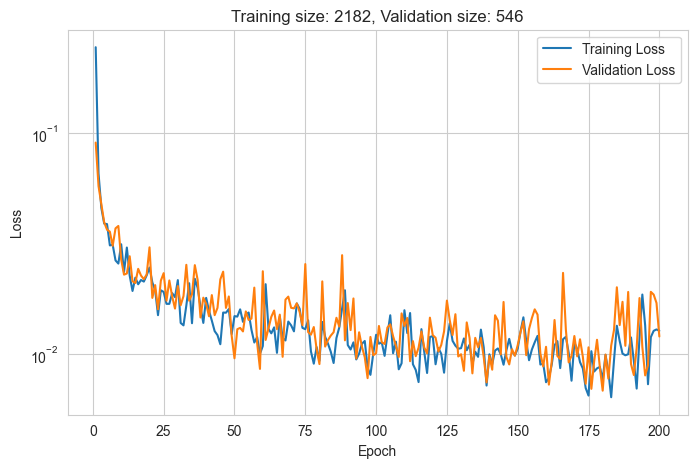

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


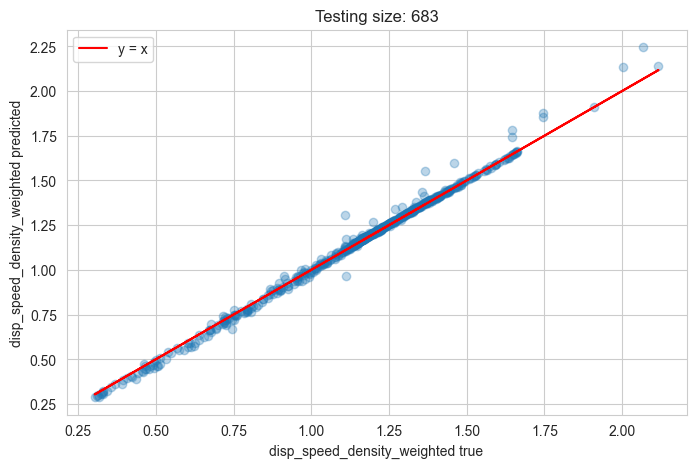

PermutationExplainer explainer: 501it [00:28, 14.62it/s]                         


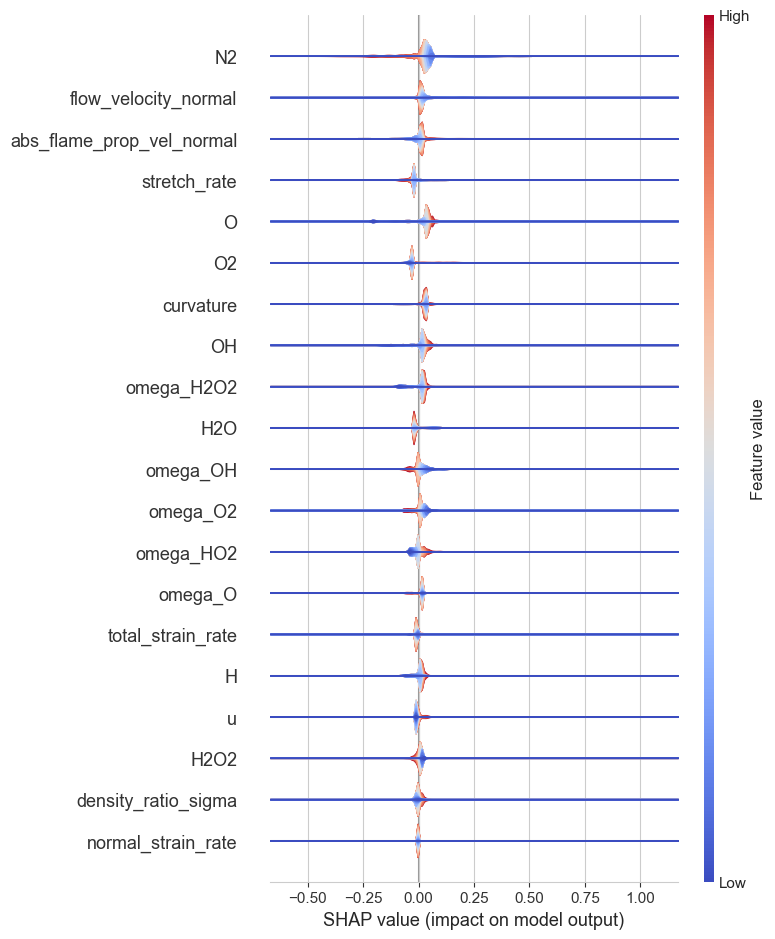

In [9]:
ml.plot_loss()
ml.evaluate()
ml.shap_summary()